In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [3]:
import pandas as pd
from histr import Shabdansh
from typing import List

In [4]:
def get_top_n_names(data_path: str = '../naam.csv', n:int=32000) -> List[str]:
    names = pd.read_csv(data_path)
    names['name'] = names['name'].map(Shabdansh)
    # remove names with only one syllable
    names = names[names['name'].map(len) > 1]
    names['is_valid_name'] = names['name'].apply(lambda name: all(map(Shabdansh.is_valid_cluster, list(name))))
    names = names[names['is_valid_name']]
    words = names.sort_values(by=['count'], ascending=False)['name'][:32000].tolist()
    return words

In [6]:
# read in all the words
words = get_top_n_names()
words[:8]

/tmp/ipykernel_3270378/636747633.py:8: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  words = names.sort_values(by=['count'], ascending=False)['name'][:32000].tolist()


['राम',
 'पुत्र',
 'राजेन्द्र',
 'राजाराम',
 'ओमप्रकाश',
 'अब्दुल',
 'छोटेलाल',
 'सीताराम']

In [7]:
len(words)

32000

In [12]:
chars_ls = [list(name) for name in words]
chars = []
for ls in chars_ls:
    chars += ls

In [14]:
purna_virama = '।'
chars = sorted(list(set(chars)))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi[purna_virama] = 0
itos = {i:s for s,i in stoi.items()}
unique_syallable_count = len(stoi)
print(itos)

{1: 'अ', 2: 'अँ', 3: 'अं', 4: 'अा', 5: 'अॅ', 6: 'अो', 7: 'अौ', 8: 'आ', 9: 'आं', 10: 'आे', 11: 'आै', 12: 'इ', 13: 'इं', 14: 'ई', 15: 'उ', 16: 'ऊ', 17: 'ऊं', 18: 'ऋ', 19: 'ऋृ', 20: 'ए', 21: 'एै', 22: 'ऐ', 23: 'ओ', 24: 'ओं', 25: 'ओे', 26: 'ओै', 27: 'औ', 28: 'औं', 29: 'क', 30: 'कँ', 31: 'कं', 32: 'का', 33: 'कां', 34: 'कि', 35: 'किं', 36: 'की', 37: 'कु', 38: 'कुँ', 39: 'कुं', 40: 'कुॅ', 41: 'कू', 42: 'कृ', 43: 'के', 44: 'कै', 45: 'को', 46: 'कौ', 47: 'क्क', 48: 'क्का', 49: 'क्की', 50: 'क्कु', 51: 'क्कू', 52: 'क्के', 53: 'क्ख', 54: 'क्खा', 55: 'क्खि', 56: 'क्खी', 57: 'क्खु', 58: 'क्खू', 59: 'क्खे', 60: 'क्खो', 61: 'क्छे', 62: 'क्ट', 63: 'क्टू', 64: 'क्त', 65: 'क्ता', 66: 'क्ति', 67: 'क्ती', 68: 'क्ते', 69: 'क्फ', 70: 'क्म', 71: 'क्मा', 72: 'क्मि', 73: 'क्मी', 74: 'क्या', 75: 'क्यू', 76: 'क्र', 77: 'क्रा', 78: 'क्रां', 79: 'क्रि', 80: 'क्री', 81: 'क्रु', 82: 'क्रे', 83: 'क्ला', 84: 'क्श', 85: 'क्शी', 86: 'क्शू', 87: 'क्ष', 88: 'क्षा', 89: 'क्षि', 90: 'क्षी', 91: 'क्षु', 92: 'क्षू', 93: 'क्षे',

In [17]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:
  
  #print(w)
  context = [0] * block_size
  for ch in list(w) + [purna_virama]:
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
#     print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append
  
X = torch.tensor(X)
Y = torch.tensor(Y)

।।। ---> रा
।।रा ---> म
।राम ---> ।
।।। ---> पु
।।पु ---> त्र
।पुत्र ---> ।
।।। ---> रा
।।रा ---> जे
।राजे ---> न्द्र
राजेन्द्र ---> ।
।।। ---> रा
।।रा ---> जा
।राजा ---> रा
राजारा ---> म
जाराम ---> ।
।।। ---> ओ
।।ओ ---> म
।ओम ---> प्र
ओमप्र ---> का
मप्रका ---> श
प्रकाश ---> ।
।।। ---> अ
।।अ ---> ब्दु
।अब्दु ---> ल
अब्दुल ---> ।
।।। ---> छो
।।छो ---> टे
।छोटे ---> ला
छोटेला ---> ल
टेलाल ---> ।
।।। ---> सी
।।सी ---> ता
।सीता ---> रा
सीतारा ---> म
ताराम ---> ।
।।। ---> ज
।।ज ---> ग
।जग ---> दी
जगदी ---> श
गदीश ---> ।
।।। ---> रा
।।रा ---> जे
।राजे ---> श
राजेश ---> ।
।।। ---> रा
।।रा ---> धे
।राधे ---> श्या
राधेश्या ---> म
धेश्याम ---> ।
।।। ---> श्री
।।श्री ---> रा
।श्रीरा ---> म
श्रीराम ---> ।
।।। ---> सु
।।सु ---> रे
।सुरे ---> श
सुरेश ---> ।
।।। ---> अ
।।अ ---> शो
।अशो ---> क
अशोक ---> ।
।।। ---> र
।।र ---> मे
।रमे ---> श
रमेश ---> ।
।।। ---> रा
।।रा ---> म
।राम ---> प्र
रामप्र ---> सा
मप्रसा ---> द
प्रसाद ---> ।
।।। ---> रा
।।रा ---> म
।राम ---> ना
रामना ---> थ
मनाथ ---> ।
।।। ---> 

।।सु ---> वो
।सुवो ---> ध
सुवोध ---> ।
।।। ---> म
।।म ---> हा
।महा ---> दे
महादे ---> व
हादेव ---> प्र
देवप्र ---> सा
वप्रसा ---> द
प्रसाद ---> ।
।।। ---> कं
।।कं ---> ध
।कंध ---> ई
कंधई ---> ला
धईला ---> ल
ईलाल ---> ।
।।। ---> ध
।।ध ---> न
।धन ---> पा
धनपा ---> ल
नपाल ---> सिं
पालसिं ---> ह
लसिंह ---> ।
।।। ---> बु
।।बु ---> द्दा
।बुद्दा ---> ।
।।। ---> शि
।।शि ---> खा
।शिखा ---> ।
।।। ---> जा
।।जा ---> म
।जाम ---> व
जामव ---> न्त
मवन्त ---> ।
।।। ---> कु
।।कु ---> ल
।कुल ---> दी
कुलदी ---> प
लदीप ---> कु
दीपकु ---> मा
पकुमा ---> र
कुमार ---> ।
।।। ---> र
।।र ---> ण
।रण ---> ।
।।। ---> इ
।।इ ---> मा
।इमा ---> मी
इमामी ---> ।
।।। ---> बु
।।बु ---> द्वि
।बुद्वि ---> रा
बुद्विरा ---> म
द्विराम ---> ।
।।। ---> क
।।क ---> ढि
।कढि ---> ले
कढिले ---> ।
।।। ---> मो
।।मो ---> नि
।मोनि ---> का
मोनिका ---> ।
।।। ---> स
।।स ---> फा
।सफा ---> त
सफात ---> ।
।।। ---> रं
।।रं ---> ग
।रंग ---> ।
।।। ---> वि
।।वि ---> ज
।विज ---> य
विजय ---> रा
जयरा ---> ज
यराज ---> ।
।।। ---> क
।।क ---> ध
।कध ---> ई
क

।।। ---> गु
।।गु ---> ला
।गुला ---> व
गुलाव ---> च
लावच ---> न्द्र
वचन्द्र ---> ।
।।। ---> आ
।।आ ---> ज
।आज ---> म
आजम ---> अ
जमअ ---> ली
मअली ---> ।
।।। ---> जी
।।जी ---> या
।जीया ---> ला
जीयाला ---> ल
यालाल ---> ।
।।। ---> ग
।।ग ---> म्हा
।गम्हा ---> ।
।।। ---> ग
।।ग ---> न्नी
।गन्नी ---> ।
।।। ---> र
।।र ---> वि
।रवि ---> ना
रविना ---> थ
विनाथ ---> ।
।।। ---> श
।।श ---> फी
।शफी ---> क
शफीक ---> अ
फीकअ ---> ह
कअह ---> म
अहम ---> द
हमद ---> ।
।।। ---> इ
।।इ ---> र
।इर ---> ।
।।। ---> स
।।स ---> चे
।सचे ---> न्द्र
सचेन्द्र ---> ।
।।। ---> अ
।।अ ---> व
।अव ---> ध
अवध ---> ला
वधला ---> ल
धलाल ---> ।
।।। ---> श्री
।।श्री ---> गो
।श्रीगो ---> वि
श्रीगोवि ---> न्द
गोविन्द ---> ।
।।। ---> नि
।।नि ---> रो
।निरो ---> ती
निरोती ---> ।
।।। ---> पी
।।पी ---> र
।पीर ---> मु
पीरमु ---> ह
रमुह ---> म्म
मुहम्म ---> द
हम्मद ---> ।
।।। ---> ति
।।ति ---> ले
।तिले ---> श्व
तिलेश्व ---> र
लेश्वर ---> ।
।।। ---> भ
।।भ ---> ग
।भग ---> ना
भगना ---> ।
।।। ---> छि
।।छि ---> द्दी
।छिद्दी ---> ।
।।। ---> दा
।।दा

।मह ---> मू
महमू ---> द
हमूद ---> खां
मूदखां ---> ।
।।। ---> ग
।।ग ---> न
।गन ---> प
गनप ---> त
नपत ---> सिं
पतसिं ---> ह
तसिंह ---> ।
।।। ---> गु
।।गु ---> ला
।गुला ---> बो
गुलाबो ---> ।
।।। ---> ल
।।ल ---> ड्डू
।लड्डू ---> ।
।।। ---> रू
।।रू ---> प
।रूप ---> दे
रूपदे ---> ई
पदेई ---> ।
।।। ---> सु
।।सु ---> रे
।सुरे ---> शा
सुरेशा ---> ।
।।। ---> भै
।।भै ---> रो
।भैरो ---> ला
भैरोला ---> ल
रोलाल ---> ।
।।। ---> ज
।।ज ---> य
।जय ---> प्र
जयप्र ---> का
यप्रका ---> स
प्रकास ---> ।
।।। ---> रा
।।रा ---> म
।राम ---> कौ
रामकौ ---> र
मकौर ---> ।
।।। ---> जु
।।जु ---> ल्फी
।जुल्फी ---> ।
।।। ---> मं
।।मं ---> ग
।मंग ---> ले
मंगले ---> श्व
गलेश्व ---> र
लेश्वर ---> ।
।।। ---> ह
।।ह ---> रि
।हरि ---> ना
हरिना ---> थ
रिनाथ ---> सिं
नाथसिं ---> ह
थसिंह ---> ।
।।। ---> हु
।।हु ---> स्न
।हुस्न ---> ।
।।। ---> स
।।स ---> हा
।सहा ---> वु
सहावु ---> द्दी
हावुद्दी ---> न
वुद्दीन ---> ।
।।। ---> को
।।को ---> क
।कोक ---> ।
।।। ---> अ
।।अ ---> व
।अव ---> धी
अवधी ---> ।
।।। ---> दिे
।।दिे ---> ने
।दिेने -

सुभाव ---> ।
।।। ---> सा
।।सा ---> धू
।साधू ---> प्र
साधूप्र ---> सा
धूप्रसा ---> द
प्रसाद ---> ।
।।। ---> इ
।।इ ---> न
।इन ---> रु
इनरु ---> ।
।।। ---> ह
।।ह ---> रि
।हरि ---> के
हरिके ---> व
रिकेव ---> ल
केवल ---> ।
।।। ---> ब
।।ब ---> ब्ब
।बब्ब ---> लू
बब्बलू ---> ।
।।। ---> वा
।।वा ---> ले
।वाले ---> श्व
वालेश्व ---> र
लेश्वर ---> द
श्वरद ---> या
रदया ---> ल
दयाल ---> ।
।।। ---> रो
।।रो ---> ही
।रोही ---> त
रोहीत ---> ।
।।। ---> वे
।।वे ---> द
।वेद ---> रा
वेदरा ---> म
दराम ---> सिं
रामसिं ---> ह
मसिंह ---> ।
।।। ---> जा
।।जा ---> ली
।जाली ---> ।
।।। ---> शा
।।शा ---> न्त
।शान्त ---> ।
।।। ---> ज
।।ज ---> गे
।जगे ---> श
जगेश ---> ।
।।। ---> खु
।।खु ---> दा
।खुदा ---> व
खुदाव ---> ख्श
दावख्श ---> ।
।।। ---> कृ
।।कृ ---> ष्ण
।कृष्ण ---> का
कृष्णका ---> न्ती
ष्णकान्ती ---> ।
।।। ---> धु
।।धु ---> पि
।धुपि ---> या
धुपिया ---> ।
।।। ---> शा
।।शा ---> ह
।शाह ---> ना
शाहना ---> ज
हनाज ---> ।
।।। ---> कु
।।कु ---> वां
।कुवां ---> रे
कुवांरे ---> ।
।।। ---> अ
।।अ ---> जा
।अजा ---> य
अजाय --

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([161660, 3]), torch.int64, torch.Size([161660]), torch.int64)

In [19]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in list(w) + [purna_virama]:
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([129377, 3]) torch.Size([129377])
torch.Size([16142, 3]) torch.Size([16142])
torch.Size([16141, 3]) torch.Size([16141])


In [23]:
emb_dim = 4
C = torch.randn((unique_syallable_count, emb_dim))

In [24]:
emb = C[X]
emb.shape

torch.Size([161660, 3, 4])

In [27]:
input_dim = block_size * emb_dim
W1 = torch.randn((input_dim, 100))
b1 = torch.randn(100)

In [28]:
h = torch.tanh(emb.view(-1, input_dim) @ W1 + b1)

In [29]:
h

tensor([[ 0.9992, -0.9993, -0.9776,  ..., -0.9997, -0.3696,  0.2697],
        [ 0.9995, -0.9984, -0.6448,  ..., -0.8748, -0.9625,  0.2602],
        [ 0.9839, -0.2574, -0.9808,  ..., -1.0000, -0.7000,  0.9922],
        ...,
        [ 0.3217, -0.8284, -1.0000,  ...,  0.9943, -0.3018,  0.9546],
        [ 0.5553,  0.9993, -0.9392,  ...,  1.0000, -0.9943, -0.9655],
        [ 0.7415,  0.4647,  0.0764,  ..., -0.8399, -0.9998,  0.6484]])

In [30]:
h.shape

torch.Size([161660, 100])

In [31]:
W2 = torch.randn((100, unique_syallable_count))
b2 = torch.randn(unique_syallable_count)

In [32]:
logits = h @ W2 + b2

In [33]:
logits.shape

torch.Size([161660, 1296])

In [34]:
counts = logits.exp()

In [35]:
prob = counts / counts.sum(1, keepdims=True)

In [36]:
prob.shape

torch.Size([161660, 1296])

In [38]:
loss = -prob[torch.arange(161660), Y].log().mean()
loss

tensor(27.9671)

In [ ]:
# ------------ now made respectable :) ---------------

In [780]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182441, 3]), torch.Size([182441]))

In [44]:
emb_dim = 10
input_dim = emb_dim * block_size
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((unique_syallable_count, emb_dim), generator=g)
W1 = torch.randn((input_dim, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, unique_syallable_count), generator=g)
b2 = torch.randn(unique_syallable_count, generator=g)
parameters = [C, W1, b1, W2, b2]

In [45]:
sum(p.nelement() for p in parameters) # number of parameters in total

279656

In [46]:
for p in parameters:
  p.requires_grad = True

In [47]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [48]:
lri = []
lossi = []
stepi = []

In [52]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  if not i%100:
    print(f"At Step {i}: {loss.item()}")
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

At Step 0: 3.750117540359497
At Step 100: 3.6609878540039062
At Step 200: 2.880162239074707
At Step 300: 3.366001844406128
At Step 400: 3.3493599891662598
At Step 500: 4.420114040374756
At Step 600: 5.384812831878662
At Step 700: 4.085030555725098
At Step 800: 4.06300687789917
At Step 900: 4.513635158538818
At Step 1000: 3.8318707942962646
At Step 1100: 4.639335632324219
At Step 1200: 4.2594757080078125
At Step 1300: 3.3452565670013428
At Step 1400: 3.817983388900757
At Step 1500: 3.800236463546753
At Step 1600: 3.60121750831604
At Step 1700: 3.9700491428375244
At Step 1800: 4.198492050170898
At Step 1900: 3.005530834197998
At Step 2000: 3.8816587924957275
At Step 2100: 3.580688238143921
At Step 2200: 4.538496971130371
At Step 2300: 3.4829208850860596
At Step 2400: 2.6762008666992188
At Step 2500: 2.6731746196746826
At Step 2600: 3.778057336807251
At Step 2700: 4.09777307510376
At Step 2800: 3.774552583694458
At Step 2900: 3.48287034034729
At Step 3000: 4.230902671813965
At Step 3100: 

At Step 25100: 3.987821578979492
At Step 25200: 3.4742157459259033
At Step 25300: 3.2600388526916504
At Step 25400: 4.323529243469238
At Step 25500: 3.237233877182007
At Step 25600: 3.5721945762634277
At Step 25700: 3.7966561317443848
At Step 25800: 3.7569921016693115
At Step 25900: 3.851485013961792
At Step 26000: 3.535336494445801
At Step 26100: 3.797287940979004
At Step 26200: 3.0344395637512207
At Step 26300: 3.6502609252929688
At Step 26400: 4.060224533081055
At Step 26500: 3.66953182220459
At Step 26600: 3.226016044616699
At Step 26700: 4.692263603210449
At Step 26800: 3.6333396434783936
At Step 26900: 3.176400899887085
At Step 27000: 4.126070499420166
At Step 27100: 3.7868716716766357
At Step 27200: 4.025759696960449
At Step 27300: 3.708448886871338
At Step 27400: 2.9117212295532227
At Step 27500: 3.5606513023376465
At Step 27600: 3.459223985671997
At Step 27700: 3.728224992752075
At Step 27800: 4.115213394165039
At Step 27900: 4.816877365112305
At Step 28000: 3.916271924972534


At Step 49900: 3.7771401405334473
At Step 50000: 3.79390025138855
At Step 50100: 3.862717866897583
At Step 50200: 4.025516033172607
At Step 50300: 3.7312421798706055
At Step 50400: 3.3175392150878906
At Step 50500: 3.1468048095703125
At Step 50600: 3.8845067024230957
At Step 50700: 4.117833137512207
At Step 50800: 3.317302942276001
At Step 50900: 3.553657293319702
At Step 51000: 3.240626335144043
At Step 51100: 3.837480068206787
At Step 51200: 3.3593626022338867
At Step 51300: 4.742502689361572
At Step 51400: 4.139566898345947
At Step 51500: 3.553853988647461
At Step 51600: 3.7361268997192383
At Step 51700: 3.7367136478424072
At Step 51800: 4.046456336975098
At Step 51900: 3.6596522331237793
At Step 52000: 3.6444857120513916
At Step 52100: 3.377124547958374
At Step 52200: 4.386697769165039
At Step 52300: 3.108583450317383
At Step 52400: 4.23038387298584
At Step 52500: 2.7515981197357178
At Step 52600: 3.6831276416778564
At Step 52700: 3.86662220954895
At Step 52800: 3.3633944988250732


At Step 74500: 2.5064492225646973
At Step 74600: 3.8244106769561768
At Step 74700: 3.5819170475006104
At Step 74800: 3.616751194000244
At Step 74900: 2.9781174659729004
At Step 75000: 3.975228786468506
At Step 75100: 3.811540126800537
At Step 75200: 3.535649061203003
At Step 75300: 3.7310264110565186
At Step 75400: 3.5859756469726562
At Step 75500: 2.86091947555542
At Step 75600: 4.313305377960205
At Step 75700: 3.125828266143799
At Step 75800: 4.206783294677734
At Step 75900: 4.434694290161133
At Step 76000: 2.8381171226501465
At Step 76100: 2.949094772338867
At Step 76200: 4.789286136627197
At Step 76300: 3.897310495376587
At Step 76400: 2.9022250175476074
At Step 76500: 3.733086109161377
At Step 76600: 3.189899444580078
At Step 76700: 3.983393907546997
At Step 76800: 3.142000913619995
At Step 76900: 3.3796184062957764
At Step 77000: 3.7505152225494385
At Step 77100: 3.9819204807281494
At Step 77200: 4.0149760246276855
At Step 77300: 2.8609988689422607
At Step 77400: 3.80811834335327

At Step 99000: 3.7365176677703857
At Step 99100: 3.33477783203125
At Step 99200: 3.6330716609954834
At Step 99300: 3.833674430847168
At Step 99400: 3.364178419113159
At Step 99500: 3.9197170734405518
At Step 99600: 3.2344071865081787
At Step 99700: 3.9007954597473145
At Step 99800: 3.399759292602539
At Step 99900: 3.7218141555786133
At Step 100000: 3.0054986476898193
At Step 100100: 2.7656235694885254
At Step 100200: 5.053630352020264
At Step 100300: 2.8894004821777344
At Step 100400: 3.108022689819336
At Step 100500: 3.5273334980010986
At Step 100600: 3.5402257442474365
At Step 100700: 3.3756263256073
At Step 100800: 2.933861494064331
At Step 100900: 3.887807607650757
At Step 101000: 3.846426486968994
At Step 101100: 2.823842763900757
At Step 101200: 3.167757272720337
At Step 101300: 3.5343422889709473
At Step 101400: 3.9411752223968506
At Step 101500: 3.5261335372924805
At Step 101600: 3.8316051959991455
At Step 101700: 4.103978157043457
At Step 101800: 3.201504707336426
At Step 1019

At Step 123000: 3.4170610904693604
At Step 123100: 3.445084571838379
At Step 123200: 3.228783369064331
At Step 123300: 3.2189760208129883
At Step 123400: 3.2763638496398926
At Step 123500: 3.4600205421447754
At Step 123600: 3.1888864040374756
At Step 123700: 3.3258156776428223
At Step 123800: 2.8000400066375732
At Step 123900: 3.9774370193481445
At Step 124000: 3.152769088745117
At Step 124100: 2.845447301864624
At Step 124200: 2.947371482849121
At Step 124300: 3.8401601314544678
At Step 124400: 2.731189012527466
At Step 124500: 3.7805118560791016
At Step 124600: 2.9186151027679443
At Step 124700: 3.2818233966827393
At Step 124800: 2.813807487487793
At Step 124900: 3.474459409713745
At Step 125000: 3.585628032684326
At Step 125100: 3.4169533252716064
At Step 125200: 3.308473825454712
At Step 125300: 3.7247467041015625
At Step 125400: 3.8899993896484375
At Step 125500: 3.353485107421875
At Step 125600: 3.579508066177368
At Step 125700: 3.2744271755218506
At Step 125800: 3.11690855026245

At Step 146900: 3.2729973793029785
At Step 147000: 4.396178722381592
At Step 147100: 3.294590950012207
At Step 147200: 3.4665367603302
At Step 147300: 3.8737881183624268
At Step 147400: 3.2410855293273926
At Step 147500: 3.412045478820801
At Step 147600: 4.353262424468994
At Step 147700: 3.1321070194244385
At Step 147800: 3.3691811561584473
At Step 147900: 3.9380931854248047
At Step 148000: 3.6830685138702393
At Step 148100: 3.967539072036743
At Step 148200: 3.0867412090301514
At Step 148300: 4.095088958740234
At Step 148400: 3.2574615478515625
At Step 148500: 2.9379565715789795
At Step 148600: 2.89188814163208
At Step 148700: 3.8665435314178467
At Step 148800: 3.467423677444458
At Step 148900: 3.1764092445373535
At Step 149000: 3.6954073905944824
At Step 149100: 2.8086698055267334
At Step 149200: 3.5305933952331543
At Step 149300: 3.861621141433716
At Step 149400: 2.8906617164611816
At Step 149500: 3.840388536453247
At Step 149600: 4.132033824920654
At Step 149700: 2.6443912982940674


At Step 170800: 4.1487717628479
At Step 170900: 3.3271660804748535
At Step 171000: 3.351083278656006
At Step 171100: 4.444085121154785
At Step 171200: 2.687312364578247
At Step 171300: 3.9223709106445312
At Step 171400: 2.778296947479248
At Step 171500: 3.3928301334381104
At Step 171600: 2.505652904510498
At Step 171700: 4.01896333694458
At Step 171800: 2.953730821609497
At Step 171900: 4.0230937004089355
At Step 172000: 3.2997543811798096
At Step 172100: 3.5744659900665283
At Step 172200: 3.2140612602233887
At Step 172300: 2.864125967025757
At Step 172400: 3.029689311981201
At Step 172500: 3.0262930393218994
At Step 172600: 2.903582811355591
At Step 172700: 3.761854410171509
At Step 172800: 3.215606212615967
At Step 172900: 3.5753159523010254
At Step 173000: 3.800811290740967
At Step 173100: 4.049415111541748
At Step 173200: 2.9373393058776855
At Step 173300: 3.0635793209075928
At Step 173400: 2.516709089279175
At Step 173500: 3.4555447101593018
At Step 173600: 3.711440086364746
At St

At Step 194800: 2.6906208992004395
At Step 194900: 3.329463005065918
At Step 195000: 3.586087226867676
At Step 195100: 3.6058897972106934
At Step 195200: 3.249821662902832
At Step 195300: 3.7215042114257812
At Step 195400: 3.1336870193481445
At Step 195500: 2.8808672428131104
At Step 195600: 3.024658203125
At Step 195700: 3.741114377975464
At Step 195800: 3.035133123397827
At Step 195900: 3.9164695739746094
At Step 196000: 2.7351791858673096
At Step 196100: 3.060037612915039
At Step 196200: 3.8198633193969727
At Step 196300: 3.3674838542938232
At Step 196400: 2.4281444549560547
At Step 196500: 3.036846399307251
At Step 196600: 3.2384190559387207
At Step 196700: 2.7150967121124268
At Step 196800: 3.148557186126709
At Step 196900: 3.698390007019043
At Step 197000: 4.116458892822266
At Step 197100: 4.457076072692871
At Step 197200: 3.0836734771728516
At Step 197300: 3.1908621788024902
At Step 197400: 3.4321017265319824
At Step 197500: 3.074552059173584
At Step 197600: 3.129986047744751
At

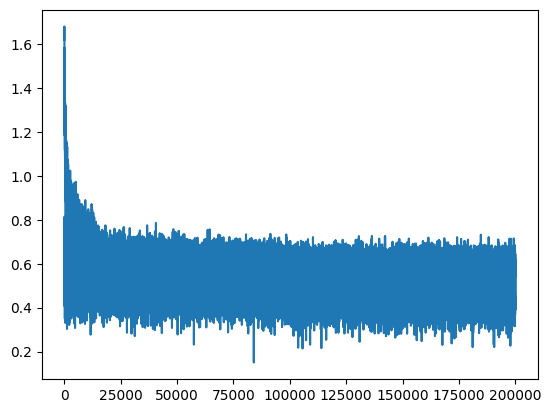

In [53]:
plt.plot(stepi, lossi)

In [54]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(3.3448, grad_fn=<NllLossBackward0>)

In [55]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(3.5948, grad_fn=<NllLossBackward0>)

/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2404 (\N{DEVANAGARI DANDA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Devanagari natively.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2309 (\N{DEVANAGARI LETTER A}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2305 (\N{DEVANAGARI SIGN CANDRABINDU}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2306 (\N{DEVANAGARI SIGN ANUSVARA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython

/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2333 (\N{DEVANAGARI LETTER JHA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2364 (\N{DEVANAGARI SIGN NUKTA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 2338 (\N{DEVANAGARI LETTER DDHA}) missing from current font.
  func(*args, **kwargs)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/

/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2336 (\N{DEVANAGARI LETTER TTHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2337 (\N{DEVANAGARI LETTER DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2364 (\N{DEVANAGARI SIGN NUKTA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2338 (\N{DEVANAGARI LETTER DDHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/khandelia1000/.venv310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2339 (\N{DEVANAGARI LETTER NNA}) missing from

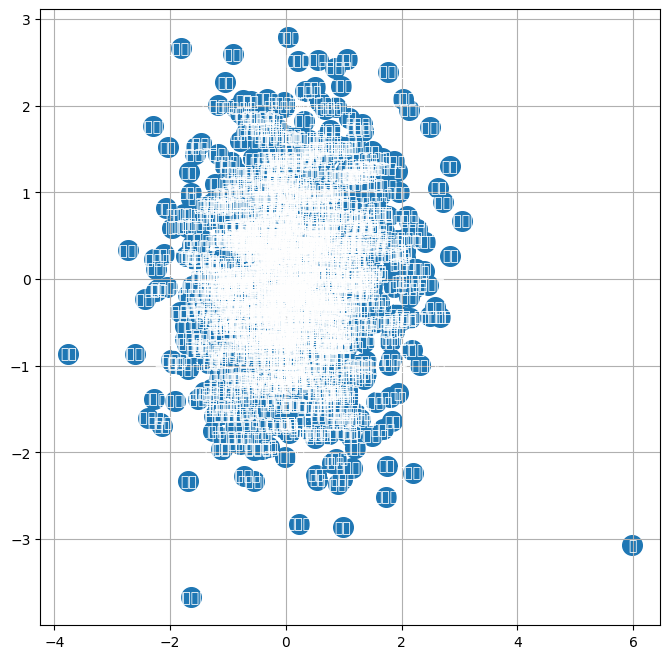

In [56]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [ ]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [57]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [58]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

अंरन्सकरनाई।
कतलाल।
वदपत।
अष्णन्जत।
कुवाप्रसाद।
सूरमनसलात।
जब।
रलाल।
बीविचर।
हलनाई।
विब्बा।
विन्तादी।
कुमाधष्नाअलीप्रसाद।
श्रीलकी।
जोलमुहम्मद।
यनोर।
कुखो।
मैरब्बर।
हासीत।
विपबचन्दर।
